In [3]:
#Dependecies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine,inspect,func
from sqlalchemy.orm import Session
import pymysql
pymysql.install_as_MySQLdb()

In [4]:
#create engine
engine=create_engine('sqlite:///Database/hawaii.sqlite')

In [5]:
#printing the table names in the database
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'stations']

In [6]:
engine.execute('select * from measurement LIMIT 10').fetchall()

[(0, 1, 'USC00519397', '2010-01-01', 0.08, 65),
 (1, 2, 'USC00519397', '2010-01-02', 0.0, 63),
 (2, 3, 'USC00519397', '2010-01-03', 0.0, 74),
 (3, 4, 'USC00519397', '2010-01-04', 0.0, 76),
 (4, 5, 'USC00519397', '2010-01-07', 0.06, 70),
 (5, 6, 'USC00519397', '2010-01-08', 0.0, 64),
 (6, 7, 'USC00519397', '2010-01-09', 0.0, 68),
 (7, 8, 'USC00519397', '2010-01-10', 0.0, 73),
 (8, 9, 'USC00519397', '2010-01-11', 0.01, 64),
 (9, 10, 'USC00519397', '2010-01-12', 0.0, 61)]

In [7]:
engine.execute('select * from stations ').fetchall()

[(0, 1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (1, 2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (2, 3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (3, 4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (4, 5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (5, 6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (6, 7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999995, 32.9),
 (7, 8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (8, 9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [8]:
#printing column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

index INTEGER
id INTEGER
station VARCHAR
date DATE
prcp FLOAT
tobs INTEGER


In [9]:
#printing column names and types
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])

index INTEGER
id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
#assign classes
Measurement = Base.classes.measurement
Station = Base.classes.stations

In [11]:
# Start a session to query the database
session = Session(engine)

In [12]:
#query to select precipitaion for one year(365 days)
yearly_prcp = session.query(Measurement.date, Measurement.prcp).limit(365).all()

In [13]:
type(yearly_prcp)

list

In [14]:
#converting the yearly precipitation to data frame
yearly_prcp_df = pd.DataFrame(yearly_prcp, columns=['Date','Precipitation'])


In [15]:
yearly_prcp_df.head()

,Date,Precipitation
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-07,0.06


In [16]:
yearly_prcp_df = yearly_prcp_df.set_index('Date')

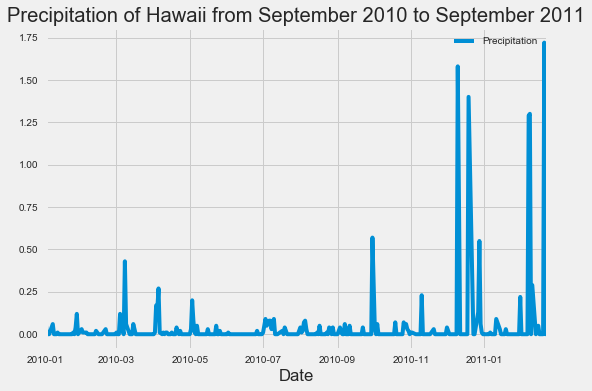

In [17]:
#ploting the yearly precipitaion
plt.style.use('fivethirtyeight')
yearly_prcp_df.plot(title='Precipitation of Hawaii from September 2010 to September 2011')
plt.show()

In [18]:
#summary Statistics of precipitation from Sep 2010 to Sep 2011
yearly_prcp_df.describe()

,Precipitation
count,365.000000
mean,0.043151
std,0.187683
min,0.000000
25%,0.000000
50%,0.000000
75%,0.010000
max,1.720000


In [19]:
#overall summary Statistics of precipitation


### Station Analysis

In [20]:
# query total no of stations
session.query(Measurement.station).distinct().count()

9

In [21]:
# query most active station
most_active = session.query(Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).first()
most_active

('USC00519281')

In [22]:
# Rank of overall stations activity
session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [23]:
#selecting the yearly temperature for the most active station
yearly_temp = session.query(Measurement.tobs).filter(Measurement.station == most_active[0]).limit(365).all()

In [24]:
#converting the yearly temperature to data frame
yearly_temp_df = pd.DataFrame(yearly_temp, columns=['Temperature'])

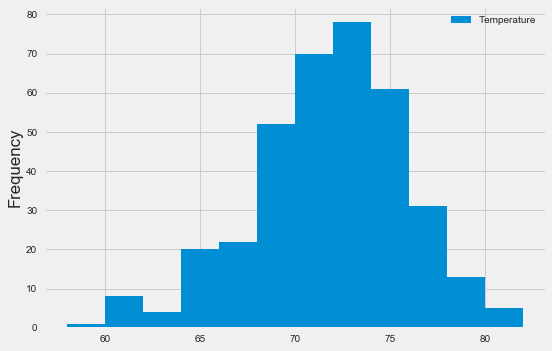

In [25]:
#plotting the fequency of Temperature at most active station
yearly_temp_df.plot.hist(bins=12,by='Temperature')
plt.show()

### Temperature Analysis

In [125]:
#setting up the start and end date format using vacation date 2017-01-01 to 2017-01-15
start_date = dt.datetime.strptime(input('Enter vacation start date in format %Y-%m-%d'), "%Y-%m-%d")
end_date = dt.datetime.strptime(input('Enter vacation end date in format %Y-%m-%d'), "%Y-%m-%d")

Enter vacation start date in format %Y-%m-%d2017-01-01
Enter vacation end date in format %Y-%m-%d2017-01-15


In [91]:
#function that calculates the max,min and avg temperature for the given vacation dates
def calc_temps(vac_start, vac_end):
    '''Calculates minimun, maximum and average temperature for the given start and end date '''
    min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.date >= vac_start).filter(Measurement.date <= vac_end).all()
    max_temp=session.query(func.max(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= vac_end).all()
    avg_temp=session.query(func.avg(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= vac_end).all()
    Temperature=[min_temp,max_temp,avg_temp]
    return Temperature

In [92]:
#calculating the vacation temperature using the calc_temps function
vac_temp=calc_temps(start_date,end_date)

In [93]:
#converting the temperature to data frame
vac_temp_df=pd.DataFrame(vac_temp)

In [87]:
vac_temp_df.head()

,0
0,"(60,)"
1,"(78,)"
2,"(68.1891891891892,)"


In [72]:
#Transposing the data frame 
vac_temp_df_tr=vac_temp_df.transpose()

In [110]:
#removing brackets and changing to integer values
vac_temp_df_tr[0]=vac_temp_df_tr[0].str[0].astype(int)
vac_temp_df_tr[1]=vac_temp_df_tr[1].str[0].astype(int)

In [111]:
vac_temp_df_tr[2]=vac_temp_df_tr[2].str[0].astype(int)

In [112]:
vac_temp_df_tr

,0,1,2
0,60,78,68


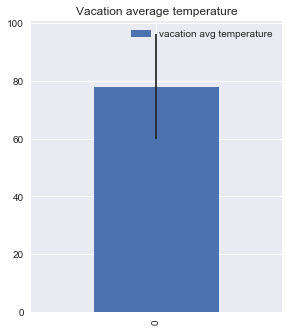

In [129]:
#bar plot of the vacation temperature
y_error=vac_temp_df_tr[1]-vac_temp_df_tr[0]
vac_temp_df_tr.plot.bar(y=1, yerr=y_error, grid=True, title='Vacation average temperature',\
                        label='vacation avg temperature')
plt.show()